In [1]:
#data set
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-100, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

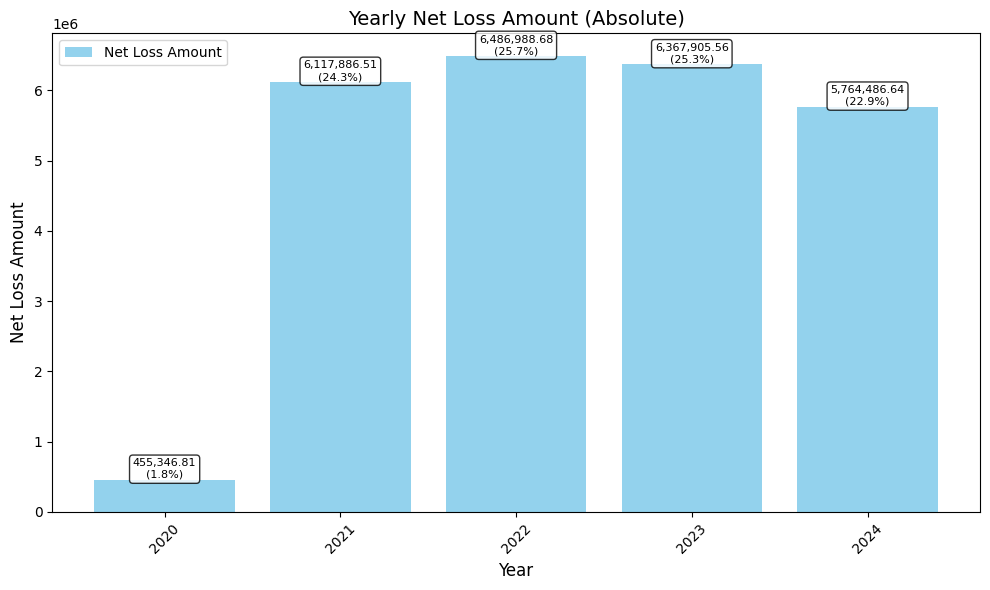

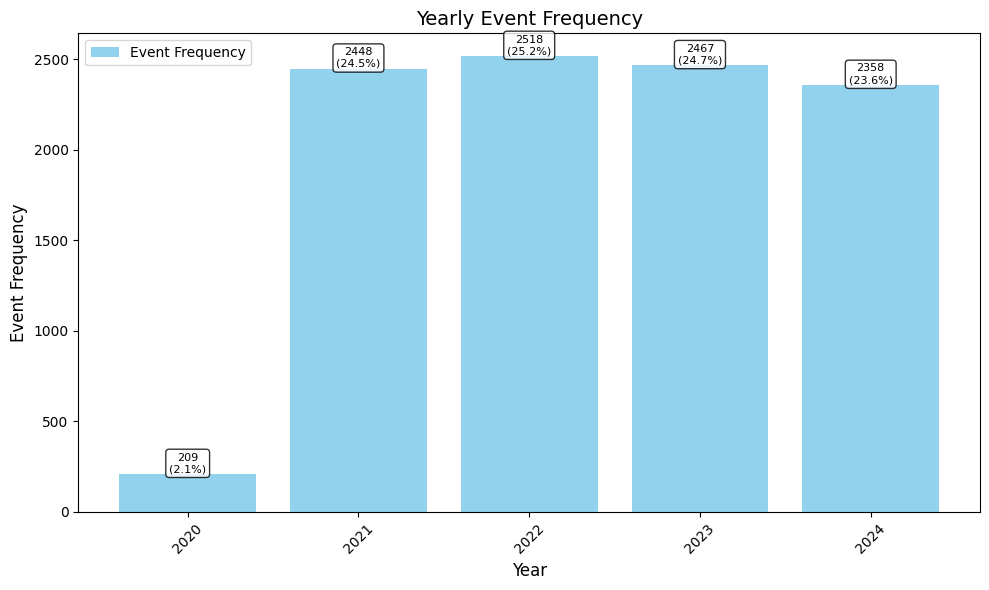

In [18]:
# Adjust label placement for negative values with box
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group data by year
df['Year'] = df['Date'].dt.year

# Yearly Net Loss Amount (only positive values or absolute values)
yearly_net_loss = df.groupby('Year')['Net Loss Amount'].sum().reset_index()

# Set condition to convert negative net loss to positive values
yearly_net_loss['Net Loss Amount'] = yearly_net_loss['Net Loss Amount'].apply(lambda x: abs(x) if x < 0 else x)

# Yearly Event Counts
yearly_event_count = df.groupby('Year')['Event Type'].count().reset_index()

# Plot 1: Yearly Net Loss Amount
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_net_loss['Year'], yearly_net_loss['Net Loss Amount'], color='skyblue', alpha=0.9, label='Net Loss Amount')
plt.title('Yearly Net Loss Amount (Absolute)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Loss Amount', fontsize=12)
plt.xticks(yearly_net_loss['Year'], rotation=45)

# Add text boxes on bars for Net Loss Amount
total_net_loss = yearly_net_loss['Net Loss Amount'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{y:,.2f}"
    percentage = f"{(y / total_net_loss) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    va = 'bottom' if y >= 0 else 'top'  # Adjust label placement for negative values
    plt.text(
        x, y, text, ha='center', va=va, fontsize=8, color='black',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: Yearly Event Frequency
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_event_count['Year'], yearly_event_count['Event Type'], color='skyblue', alpha=0.9, label='Event Frequency')
plt.title('Yearly Event Frequency', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Event Frequency', fontsize=12)
plt.xticks(yearly_event_count['Year'], rotation=45)

# Add text boxes on bars for Event Frequency
total_events = yearly_event_count['Event Type'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{int(y)}"
    percentage = f"{(y / total_events) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    plt.text(
        x, y, text, ha='center', va='bottom', fontsize=8, color='black',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


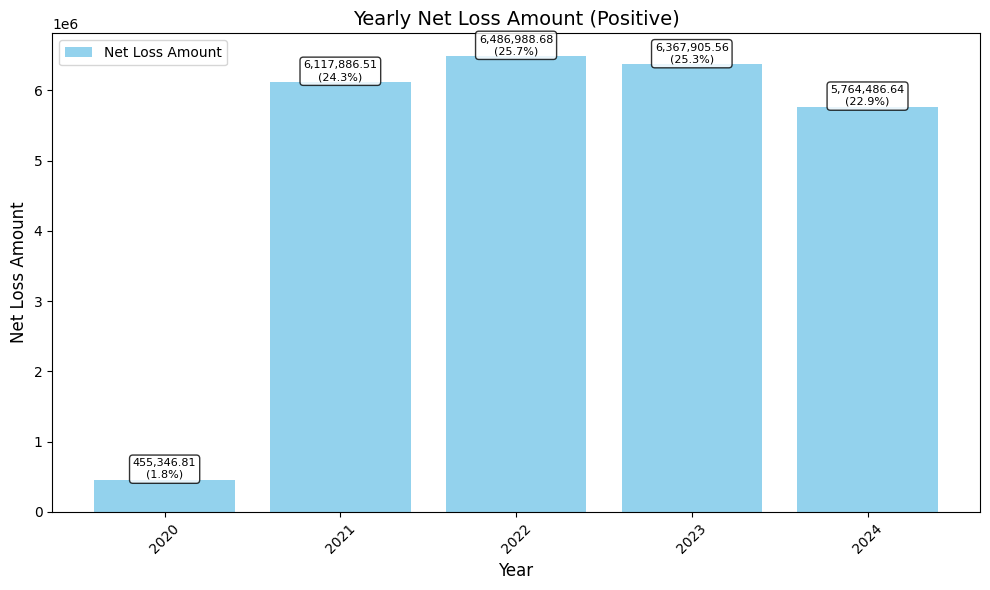

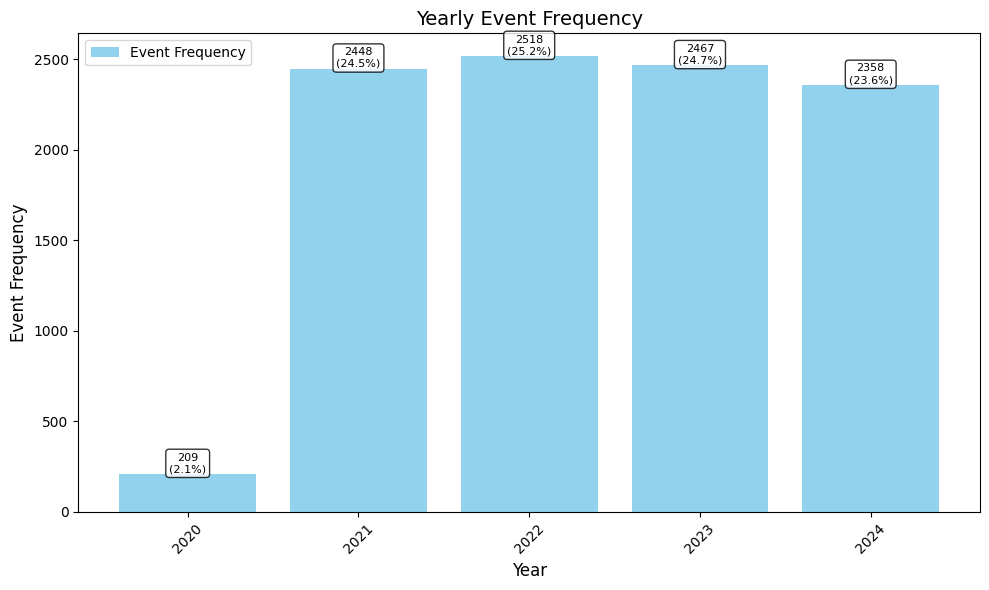

In [19]:
# # Filter for Net Loss Amount > 0 with box
# yearly_net_loss = yearly_net_loss[yearly_net_loss['Net Loss Amount'] > 0]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group data by year
df['Year'] = df['Date'].dt.year

# Yearly Net Loss Amount (filter out values <= 0)
yearly_net_loss = df.groupby('Year')['Net Loss Amount'].sum().reset_index()

# Filter for Net Loss Amount > 0
yearly_net_loss = yearly_net_loss[yearly_net_loss['Net Loss Amount'] > 0]

# Yearly Event Counts
yearly_event_count = df.groupby('Year')['Event Type'].count().reset_index()

# Plot 1: Yearly Net Loss Amount
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_net_loss['Year'], yearly_net_loss['Net Loss Amount'], color='skyblue', alpha=0.9, label='Net Loss Amount')
plt.title('Yearly Net Loss Amount (Positive)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Loss Amount', fontsize=12)
plt.xticks(yearly_net_loss['Year'], rotation=45)

# Add text boxes on bars for Net Loss Amount
total_net_loss = yearly_net_loss['Net Loss Amount'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{y:,.2f}"
    percentage = f"{(y / total_net_loss) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    va = 'bottom' if y >= 0 else 'top'  # Adjust label placement for negative values
    plt.text(
        x, y, text, ha='center', va=va, fontsize=8, color='black',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: Yearly Event Frequency
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_event_count['Year'], yearly_event_count['Event Type'], color='skyblue', alpha=0.9, label='Event Frequency')
plt.title('Yearly Event Frequency', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Event Frequency', fontsize=12)
plt.xticks(yearly_event_count['Year'], rotation=45)

# Add text boxes on bars for Event Frequency
total_events = yearly_event_count['Event Type'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{int(y)}"
    percentage = f"{(y / total_events) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    plt.text(
        x, y, text, ha='center', va='bottom', fontsize=8, color='black',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


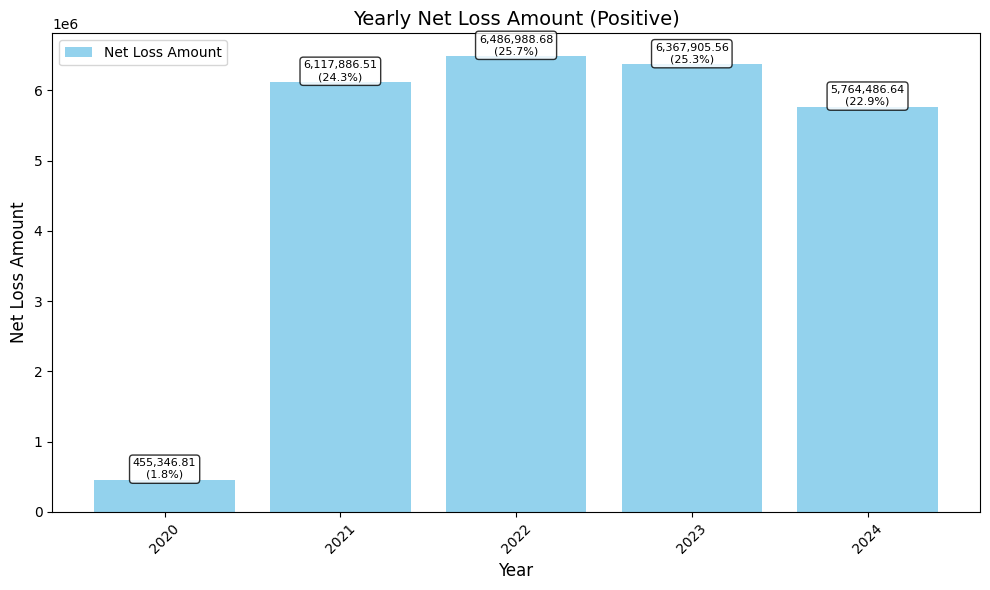

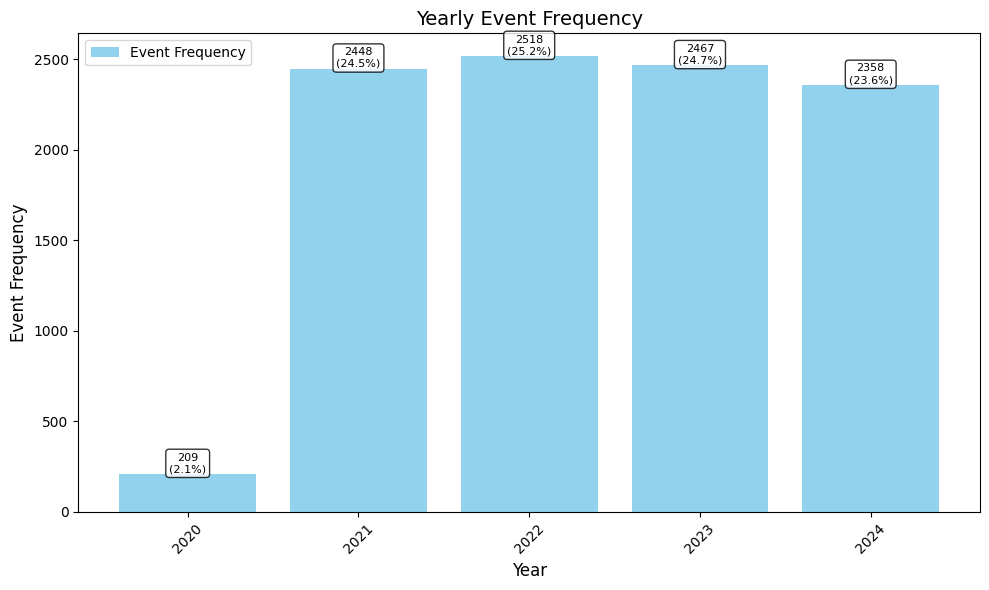

In [20]:
#add both the value and percentage inside a small box on each bar, you can place the labels on the bars with a box around them.Use this for work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group data by year
df['Year'] = df['Date'].dt.year

# Yearly Net Loss Amount (filter out values <= 0)
yearly_net_loss = df.groupby('Year')['Net Loss Amount'].sum().reset_index()

# Filter for Net Loss Amount > 0
yearly_net_loss = yearly_net_loss[yearly_net_loss['Net Loss Amount'] > 0]

# Yearly Event Counts
yearly_event_count = df.groupby('Year')['Event Type'].count().reset_index()

# Plot 1: Yearly Net Loss Amount
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_net_loss['Year'], yearly_net_loss['Net Loss Amount'], color='skyblue', alpha=0.9, label='Net Loss Amount')
plt.title('Yearly Net Loss Amount (Positive)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Loss Amount', fontsize=12)

# Set x-axis ticks to display only whole years
plt.xticks(yearly_net_loss['Year'], rotation=45)

# Add value and percentage inside boxes for Net Loss Amount
total_net_loss = yearly_net_loss['Net Loss Amount'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{y:,.2f}"
    percentage = f"{(y / total_net_loss) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    va = 'bottom' if y >= 0 else 'top'  # Adjust label placement for negative values
    # Add label inside box with both value and percentage
    plt.text(
        x, y, text, ha='center', va=va, fontsize=8, color='black',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: Yearly Event Frequency
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_event_count['Year'], yearly_event_count['Event Type'], color='skyblue', alpha=0.9, label='Event Frequency')
plt.title('Yearly Event Frequency', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Event Frequency', fontsize=12)

# Set x-axis ticks to display only whole years
plt.xticks(yearly_event_count['Year'], rotation=45)

# Add value and percentage inside boxes for Event Frequency
total_events = yearly_event_count['Event Type'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{int(y)}"
    percentage = f"{(y / total_events) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    # Add label inside box with both value and percentage
    plt.text(
        x, y, text, ha='center', va='bottom', fontsize=8, color='black',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


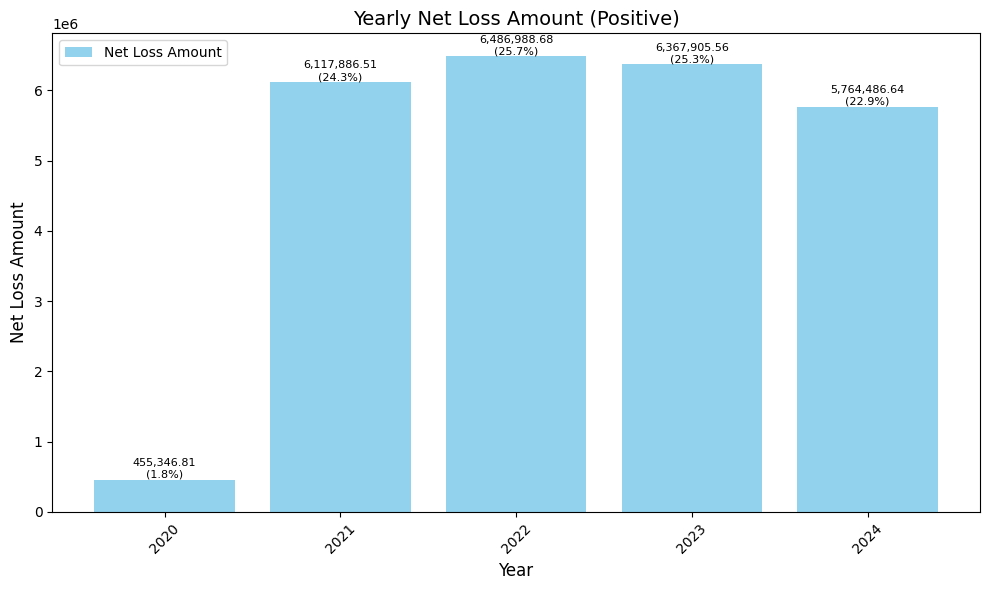

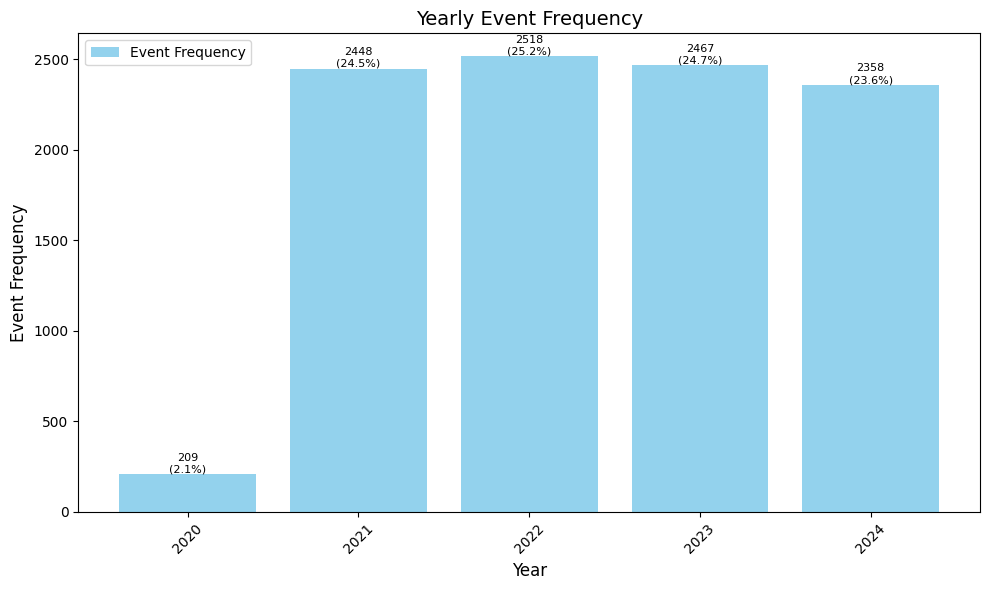

In [21]:
#to remove the text boxes from the labels while keeping the percentage and value annotations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group data by year
df['Year'] = df['Date'].dt.year

# Yearly Net Loss Amount (filter out values <= 0)
yearly_net_loss = df.groupby('Year')['Net Loss Amount'].sum().reset_index()

# Filter for Net Loss Amount > 0
yearly_net_loss = yearly_net_loss[yearly_net_loss['Net Loss Amount'] > 0]

# Yearly Event Counts
yearly_event_count = df.groupby('Year')['Event Type'].count().reset_index()

# Plot 1: Yearly Net Loss Amount
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_net_loss['Year'], yearly_net_loss['Net Loss Amount'], color='skyblue', alpha=0.9, label='Net Loss Amount')
plt.title('Yearly Net Loss Amount (Positive)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Loss Amount', fontsize=12)
plt.xticks(yearly_net_loss['Year'], rotation=45)

# Add value and percentage on bars for Net Loss Amount
total_net_loss = yearly_net_loss['Net Loss Amount'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{y:,.2f}"
    percentage = f"{(y / total_net_loss) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    va = 'bottom' if y >= 0 else 'top'  # Adjust label placement for negative values
    plt.text(
        x, y, text, ha='center', va=va, fontsize=8, color='black'
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: Yearly Event Frequency
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_event_count['Year'], yearly_event_count['Event Type'], color='skyblue', alpha=0.9, label='Event Frequency')
plt.title('Yearly Event Frequency', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Event Frequency', fontsize=12)
plt.xticks(yearly_event_count['Year'], rotation=45)

# Add value and percentage on bars for Event Frequency
total_events = yearly_event_count['Event Type'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{int(y)}"
    percentage = f"{(y / total_events) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    plt.text(
        x, y, text, ha='center', va='bottom', fontsize=8, color='black'
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


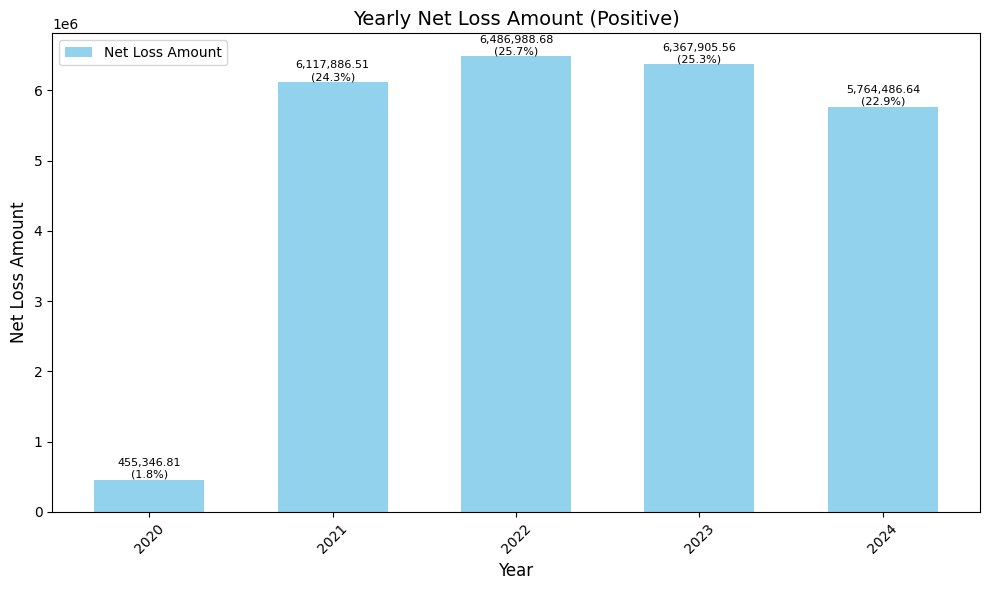

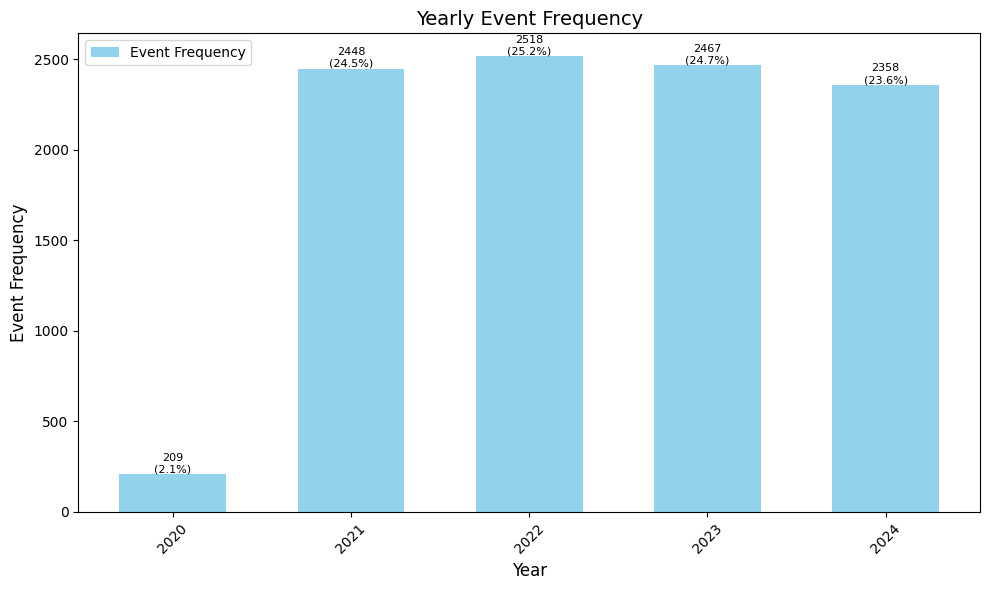

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group data by year
df['Year'] = df['Date'].dt.year

# Yearly Net Loss Amount (filter out values <= 0)
yearly_net_loss = df.groupby('Year')['Net Loss Amount'].sum().reset_index()

# Filter for Net Loss Amount > 0
yearly_net_loss = yearly_net_loss[yearly_net_loss['Net Loss Amount'] > 0]

# Yearly Event Counts
yearly_event_count = df.groupby('Year')['Event Type'].count().reset_index()

# Plot 1: Yearly Net Loss Amount
plt.figure(figsize=(10, 6))
bar_width = 0.6  # Adjust this value to control the width of the bars
bars = plt.bar(yearly_net_loss['Year'], yearly_net_loss['Net Loss Amount'], color='skyblue', alpha=0.9, label='Net Loss Amount', width=bar_width)
plt.title('Yearly Net Loss Amount (Positive)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Loss Amount', fontsize=12)
plt.xticks(yearly_net_loss['Year'], rotation=45)

# Add value and percentage on bars for Net Loss Amount
total_net_loss = yearly_net_loss['Net Loss Amount'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{y:,.2f}"
    percentage = f"{(y / total_net_loss) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    va = 'bottom' if y >= 0 else 'top'  # Adjust label placement for negative values
    plt.text(
        x, y, text, ha='center', va=va, fontsize=8, color='black'
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: Yearly Event Frequency
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_event_count['Year'], yearly_event_count['Event Type'], color='skyblue', alpha=0.9, label='Event Frequency', width=bar_width)
plt.title('Yearly Event Frequency', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Event Frequency', fontsize=12)
plt.xticks(yearly_event_count['Year'], rotation=45)

# Add value and percentage on bars for Event Frequency
total_events = yearly_event_count['Event Type'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{int(y)}"
    percentage = f"{(y / total_events) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    plt.text(
        x, y, text, ha='center', va='bottom', fontsize=8, color='black'
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


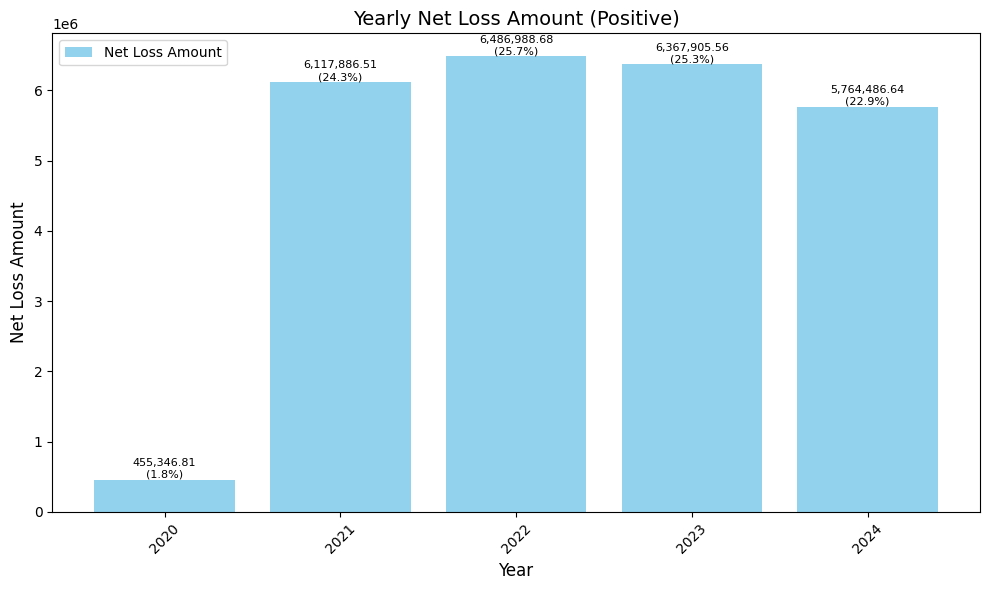

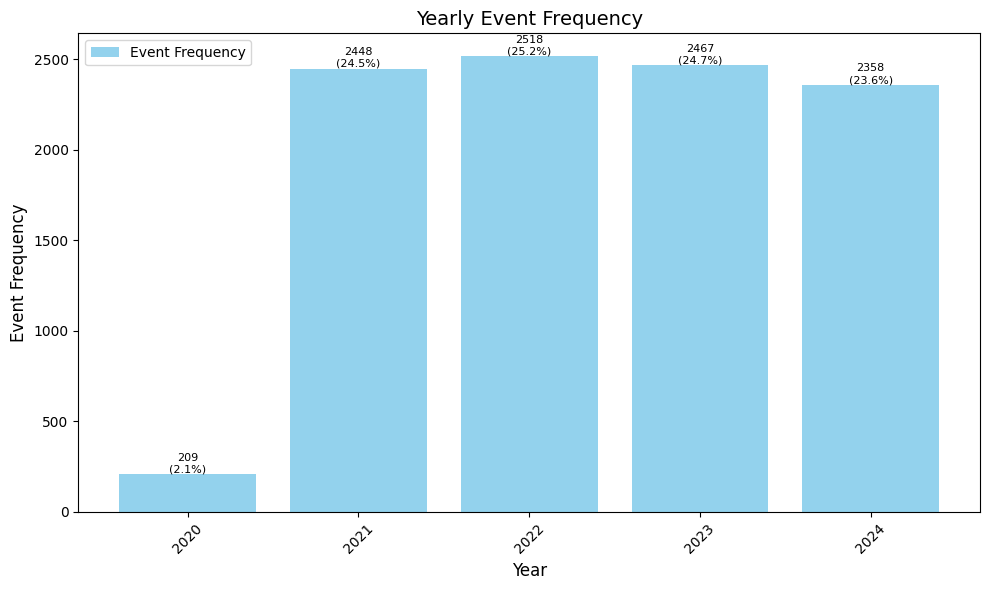

In [22]:
#specially for yaer will 2021,2022
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group data by year
df['Year'] = df['Date'].dt.year

# Yearly Net Loss Amount (filter out values <= 0)
yearly_net_loss = df.groupby('Year')['Net Loss Amount'].sum().reset_index()

# Filter for Net Loss Amount > 0
yearly_net_loss = yearly_net_loss[yearly_net_loss['Net Loss Amount'] > 0]

# Yearly Event Counts
yearly_event_count = df.groupby('Year')['Event Type'].count().reset_index()

# Plot 1: Yearly Net Loss Amount
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_net_loss['Year'], yearly_net_loss['Net Loss Amount'], color='skyblue', alpha=0.9, label='Net Loss Amount')
plt.title('Yearly Net Loss Amount (Positive)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Loss Amount', fontsize=12)

# Set x-axis ticks to display only whole years
plt.xticks(yearly_net_loss['Year'], rotation=45)

# Add value and percentage on bars for Net Loss Amount
total_net_loss = yearly_net_loss['Net Loss Amount'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{y:,.2f}"
    percentage = f"{(y / total_net_loss) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    va = 'bottom' if y >= 0 else 'top'  # Adjust label placement for negative values
    plt.text(
        x, y, text, ha='center', va=va, fontsize=8, color='black'
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: Yearly Event Frequency
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_event_count['Year'], yearly_event_count['Event Type'], color='skyblue', alpha=0.9, label='Event Frequency')
plt.title('Yearly Event Frequency', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Event Frequency', fontsize=12)

# Set x-axis ticks to display only whole years
plt.xticks(yearly_event_count['Year'], rotation=45)

# Add value and percentage on bars for Event Frequency
total_events = yearly_event_count['Event Type'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{int(y)}"
    percentage = f"{(y / total_events) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    plt.text(
        x, y, text, ha='center', va='bottom', fontsize=8, color='black'
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [14]:
#monthwise with box #for yaer and monthwise

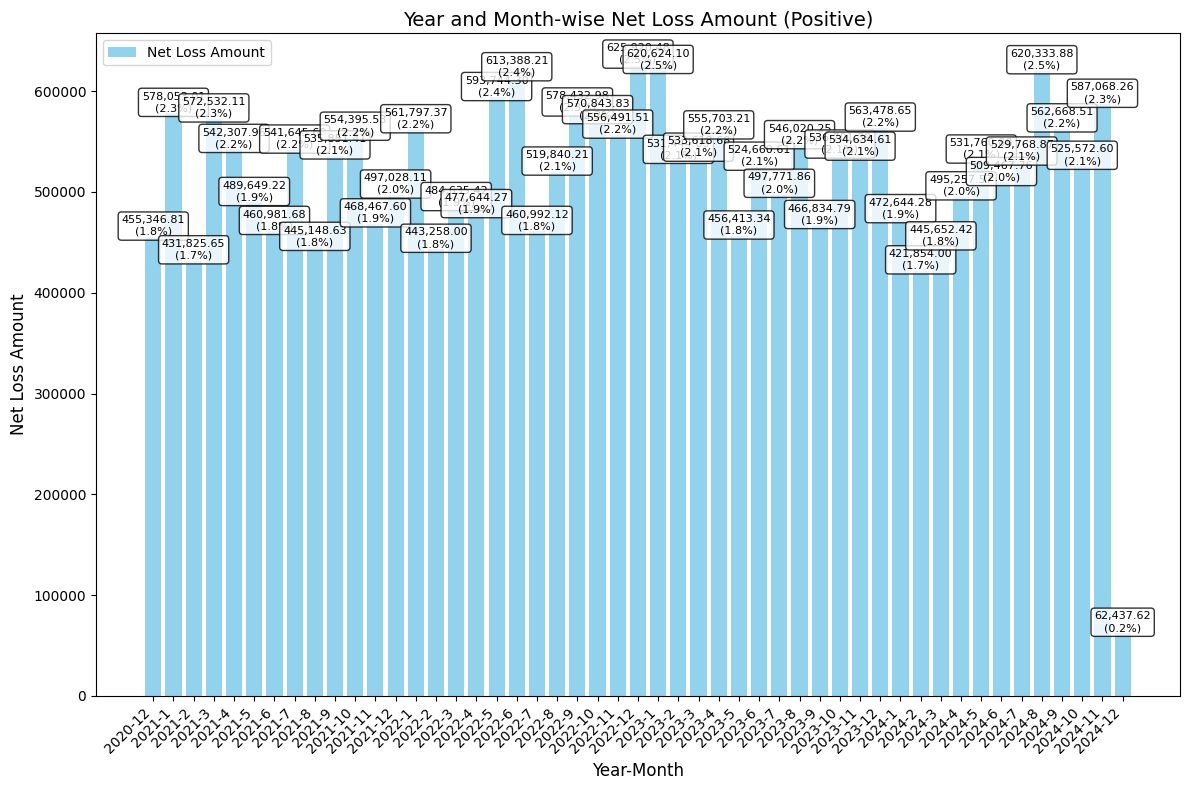

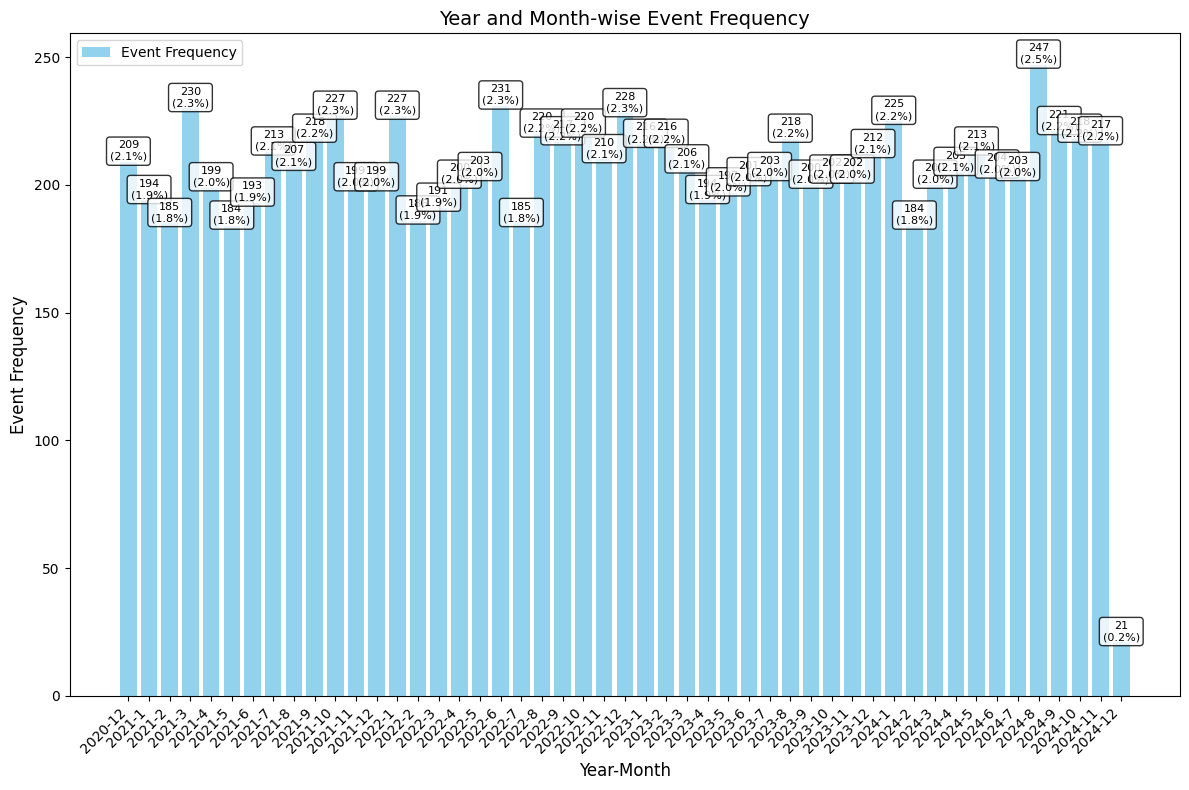

In [23]:
#monthwise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group data by year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Year and Month-wise Net Loss Amount (filter out values <= 0)
year_monthly_net_loss = df.groupby(['Year', 'Month'])['Net Loss Amount'].sum().reset_index()

# Filter for Net Loss Amount > 0
year_monthly_net_loss = year_monthly_net_loss[year_monthly_net_loss['Net Loss Amount'] > 0]

# Year and Month-wise Event Counts
year_monthly_event_count = df.groupby(['Year', 'Month'])['Event Type'].count().reset_index()

# Plot 1: Year and Month-wise Net Loss Amount
plt.figure(figsize=(12, 8))
bars = plt.bar(
    year_monthly_net_loss['Year'].astype(str) + '-' + year_monthly_net_loss['Month'].astype(str),
    year_monthly_net_loss['Net Loss Amount'], 
    color='skyblue', alpha=0.9, label='Net Loss Amount'
)
plt.title('Year and Month-wise Net Loss Amount (Positive)', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Net Loss Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add text boxes on bars for Net Loss Amount
total_net_loss = year_monthly_net_loss['Net Loss Amount'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{y:,.2f}"
    percentage = f"{(y / total_net_loss) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    plt.text(
        x, y, text, ha='center', va='bottom', fontsize=8, color='black',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: Year and Month-wise Event Frequency
plt.figure(figsize=(12, 8))
bars = plt.bar(
    year_monthly_event_count['Year'].astype(str) + '-' + year_monthly_event_count['Month'].astype(str),
    year_monthly_event_count['Event Type'],
    color='skyblue', alpha=0.9, label='Event Frequency'
)
plt.title('Year and Month-wise Event Frequency', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Event Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add text boxes on bars for Event Frequency
total_events = year_monthly_event_count['Event Type'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{int(y)}"
    percentage = f"{(y / total_events) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    plt.text(
        x, y, text, ha='center', va='bottom', fontsize=8, color='black',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


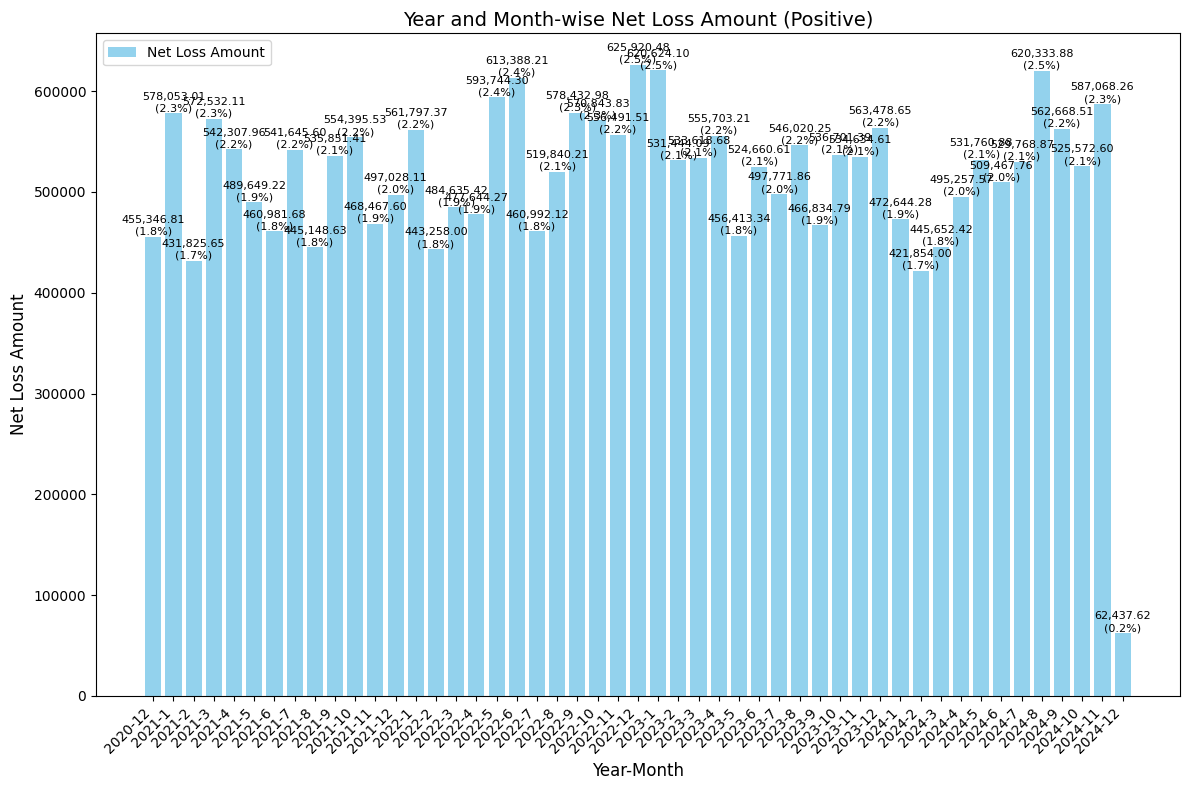

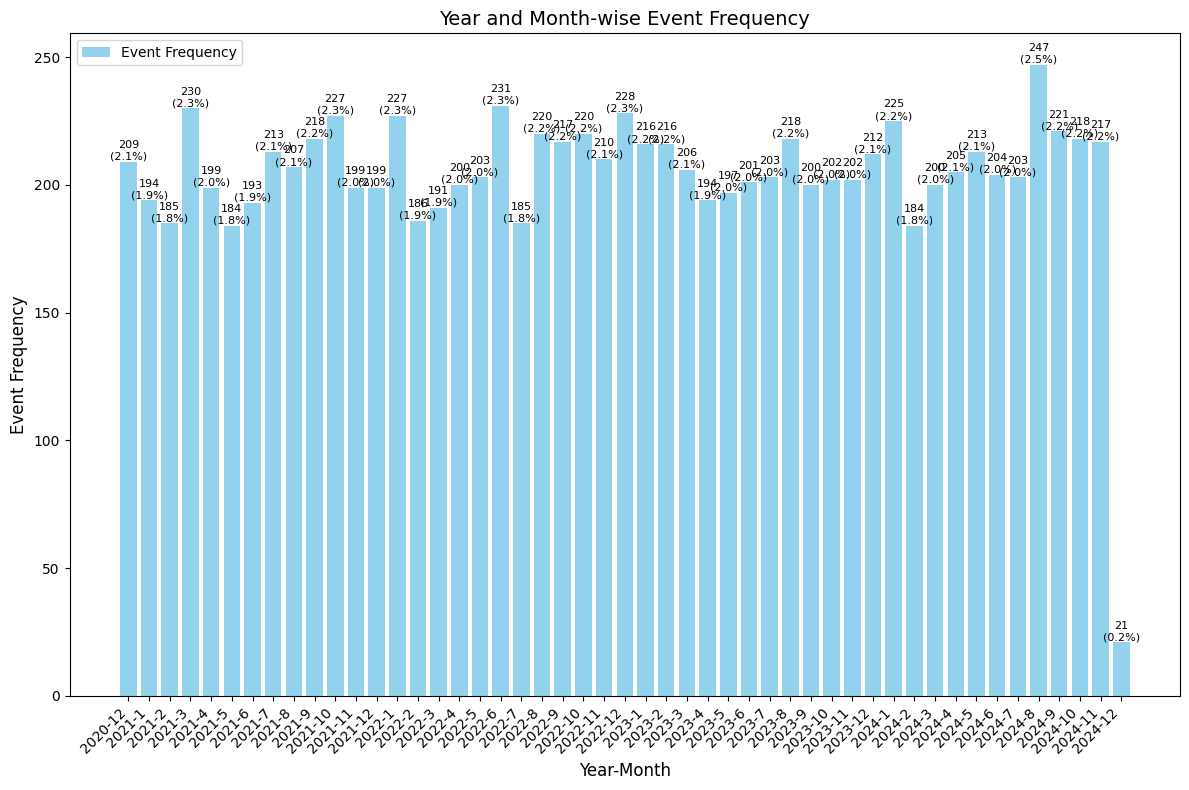

In [24]:
#To remove the boxes around the text labels and just display the values and percentages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group data by year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Year and Month-wise Net Loss Amount (filter out values <= 0)
year_monthly_net_loss = df.groupby(['Year', 'Month'])['Net Loss Amount'].sum().reset_index()

# Filter for Net Loss Amount > 0
year_monthly_net_loss = year_monthly_net_loss[year_monthly_net_loss['Net Loss Amount'] > 0]

# Year and Month-wise Event Counts
year_monthly_event_count = df.groupby(['Year', 'Month'])['Event Type'].count().reset_index()

# Plot 1: Year and Month-wise Net Loss Amount
plt.figure(figsize=(12, 8))
bars = plt.bar(
    year_monthly_net_loss['Year'].astype(str) + '-' + year_monthly_net_loss['Month'].astype(str),
    year_monthly_net_loss['Net Loss Amount'], 
    color='skyblue', alpha=0.9, label='Net Loss Amount'
)
plt.title('Year and Month-wise Net Loss Amount (Positive)', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Net Loss Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add text labels for Net Loss Amount without box
total_net_loss = year_monthly_net_loss['Net Loss Amount'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{y:,.2f}"
    percentage = f"{(y / total_net_loss) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    plt.text(
        x, y, text, ha='center', va='bottom', fontsize=8, color='black'
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: Year and Month-wise Event Frequency
plt.figure(figsize=(12, 8))
bars = plt.bar(
    year_monthly_event_count['Year'].astype(str) + '-' + year_monthly_event_count['Month'].astype(str),
    year_monthly_event_count['Event Type'],
    color='skyblue', alpha=0.9, label='Event Frequency'
)
plt.title('Year and Month-wise Event Frequency', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Event Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add text labels for Event Frequency without box
total_events = year_monthly_event_count['Event Type'].sum()
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    value = f"{int(y)}"
    percentage = f"{(y / total_events) * 100:.1f}%"
    text = f"{value}\n({percentage})"
    plt.text(
        x, y, text, ha='center', va='bottom', fontsize=8, color='black'
    )

# Add legend
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
#now for outlier first soft netloss then do netloss bubble plot bu=y index so that will get the outlier netloss

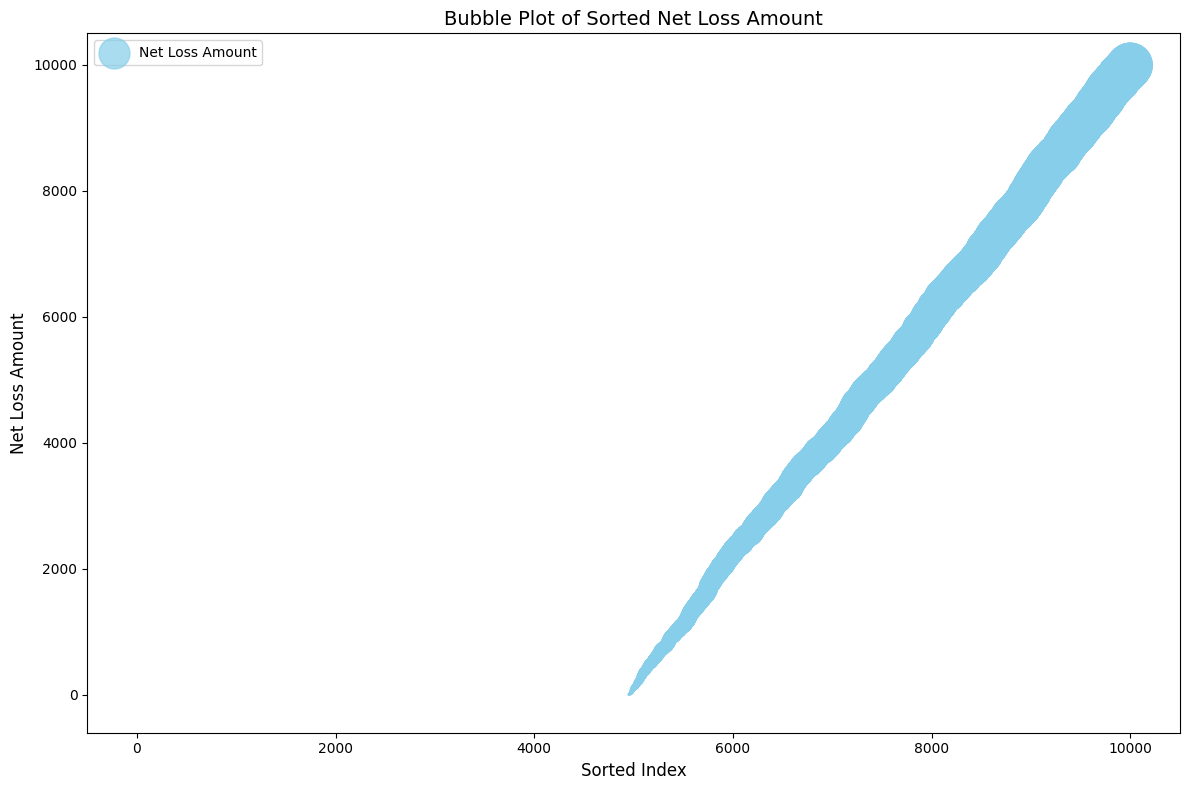

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sort the dataset by Net Loss Amount
df_sorted = df.sort_values(by='Net Loss Amount', ascending=True).reset_index(drop=True)

# Plotting the bubble plot using the sorted dataset
plt.figure(figsize=(12, 8))

# Plot the bubble plot
plt.scatter(
    df_sorted.index,  # X-axis: Sorted index of records
    df_sorted['Net Loss Amount'],  # Y-axis: Net Loss Amount
    s=df_sorted['Net Loss Amount'] / 10,  # Bubble size (scaled down by 10 for visibility)
    color='skyblue', alpha=0.7, label='Net Loss Amount'
)

# Title and labels
plt.title('Bubble Plot of Sorted Net Loss Amount', fontsize=14)
plt.xlabel('Sorted Index', fontsize=12)
plt.ylabel('Net Loss Amount', fontsize=12)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29372\3623723444.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year


Number of events with outlier net loss (> 8000): 995


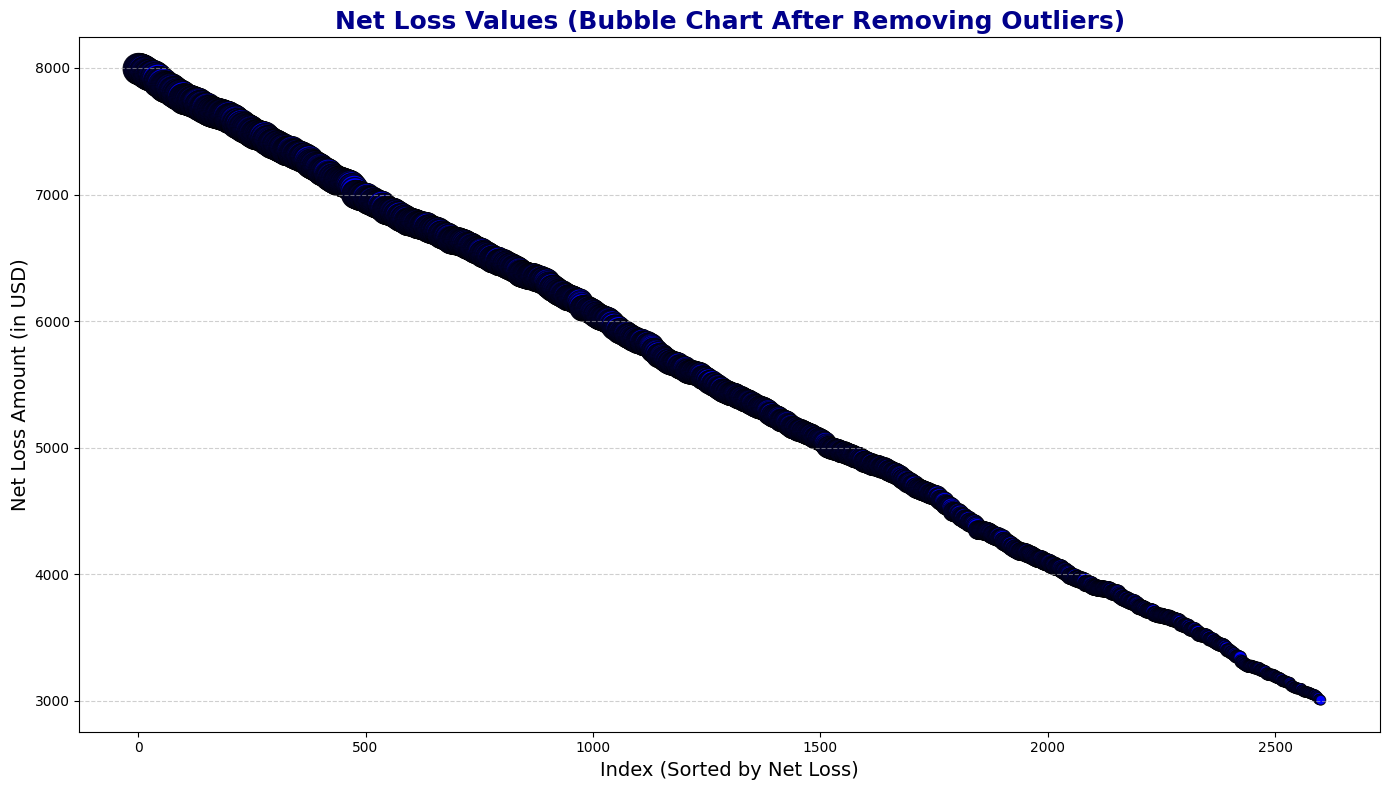

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Assuming df is your dataframe
# Filter out negative Net Loss Amount
positive_df = df[df['Net Loss Amount'] > 3000]

# Extract the year from the Date column
positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year

# Set a threshold for identifying outliers (e.g., 95th percentile of the Net Loss Amount)
# threshold = 8000  # Change this threshold as needed
# Identify outliers and count them
outliers_df = positive_df[positive_df['Net Loss Amount'] > threshold]
outlier_count = outliers_df.shape[0]

# Remove outliers from the data
filtered_df = positive_df[positive_df['Net Loss Amount'] <= threshold]

# Sort the remaining data by Net Loss Amount
sorted_df = filtered_df.sort_values(by='Net Loss Amount', ascending=False).reset_index(drop=True)

# Add an index column for plotting
sorted_df['Index'] = sorted_df.index + 1

# --- Simple Bubble Chart for Net Loss Values (After Removing Outliers) ---
plt.figure(figsize=(14, 8))
bubble_sizes = sorted_df['Net Loss Amount'] / 500  # Scale bubble sizes for better visualization

sns.scatterplot(
    x=sorted_df['Index'],
    y=sorted_df['Net Loss Amount'],
    size=bubble_sizes,
    sizes=(50, 500),  # Range for bubble sizes
    color="blue",
    edgecolor="black",
    alpha=0.7,  # Slight transparency
    legend=False
)

# Add title and labels
plt.title("Net Loss Values (Bubble Chart After Removing Outliers)", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("Index (Sorted by Net Loss)", fontsize=14)
plt.ylabel("Net Loss Amount (in USD)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show outlier count
print(f"Number of events with outlier net loss (> {threshold}): {outlier_count}")

plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29372\1665077534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year


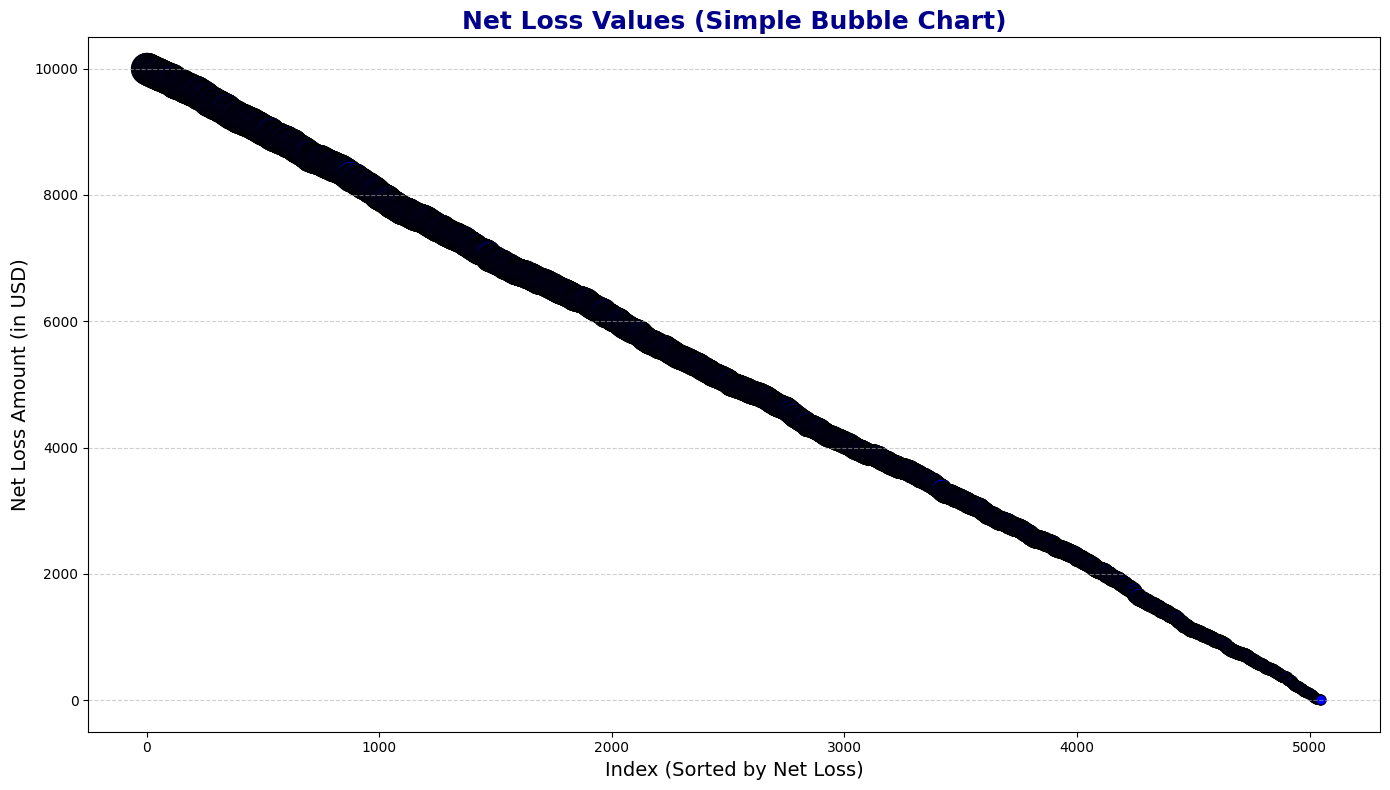

In [28]:
#simple bubbule grapgh by net loss
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter out negative Net Loss Amount
positive_df = df[df['Net Loss Amount'] > 0]

# Extract the year from the Date column
positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year

# Sort the net loss values in descending order
sorted_df = positive_df.sort_values(by='Net Loss Amount', ascending=False).reset_index(drop=True)

# Add an index column for plotting
sorted_df['Index'] = sorted_df.index + 1

# --- Simple Bubble Chart for Net Loss Values ---
plt.figure(figsize=(14, 8))
bubble_sizes = sorted_df['Net Loss Amount'] / 500  # Scale bubble sizes for better visualization

sns.scatterplot(
    x=sorted_df['Index'],
    y=sorted_df['Net Loss Amount'],
    size=bubble_sizes,
    sizes=(50, 500),  # Range for bubble sizes
    color="blue",
    edgecolor="black",
    alpha=0.7,  # Slight transparency
    legend=False
)

# Add title and labels
plt.title("Net Loss Values (Simple Bubble Chart)", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("Index (Sorted by Net Loss)", fontsize=14)
plt.ylabel("Net Loss Amount (in USD)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29372\1140395847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year


Sorted Data (after removing outliers):
                           Date Unique Event ID            Event Type  \
0    2022-06-10 23:18:36.929385        EID04230           Vendor Risk   
1    2023-01-21 23:18:36.929385        EID00291  Regulatory Violation   
2    2021-01-22 23:18:36.929385        EID09131  Regulatory Violation   
3    2023-01-04 23:18:36.929385        EID08751                 Fraud   
4    2023-04-03 23:18:36.929385        EID05435           Market Risk   
...                         ...             ...                   ...   
4050 2022-09-08 23:18:36.929385        EID04815            Compliance   
4051 2024-01-28 23:18:36.929385        EID06695  Regulatory Violation   
4052 2022-08-01 23:18:36.929385        EID09158  Regulatory Violation   
4053 2023-05-07 23:18:36.929385        EID02647          Cyber Attack   
4054 2022-12-06 23:18:36.929385        EID05819           Market Risk   

             Business Line         Event Description  Net Loss Amount  Year  \
0    

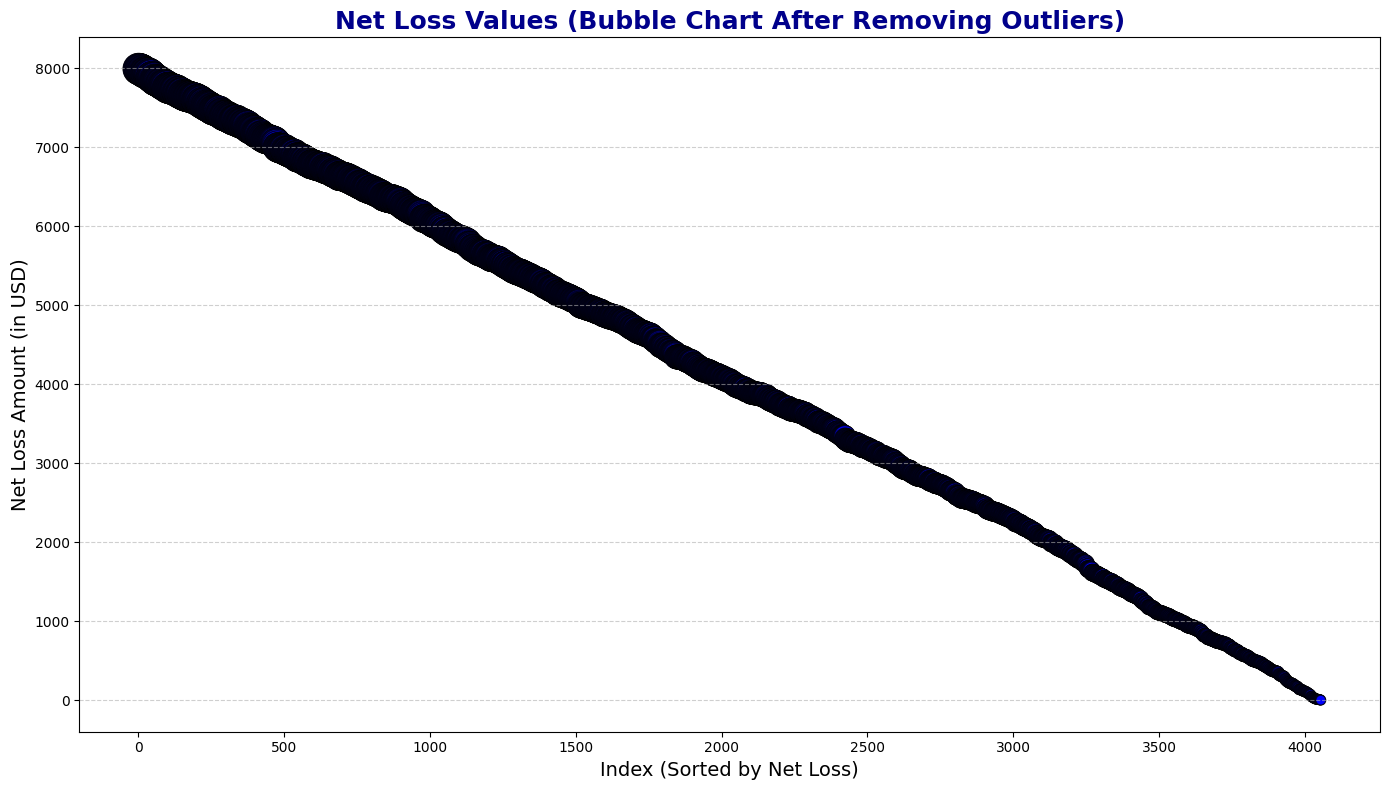

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Assuming df is your dataframe
# Filter out negative Net Loss Amount
positive_df = df[df['Net Loss Amount'] > 0]

# Extract the year from the Date column
positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year

# Set a threshold for identifying outliers (e.g., 95th percentile of the Net Loss Amount)
threshold = 8000  # Change this threshold as needed
# Identify outliers and count them
outliers_df = positive_df[positive_df['Net Loss Amount'] > threshold]
outlier_count = outliers_df.shape[0]

# Remove outliers from the data
filtered_df = positive_df[positive_df['Net Loss Amount'] <= threshold]

# Sort the remaining data by Net Loss Amount
sorted_df = filtered_df.sort_values(by='Net Loss Amount', ascending=False).reset_index(drop=True)

# Add an index column for plotting
sorted_df['Index'] = sorted_df.index + 1

# Print the sorted dataframe (to view the data)
print("Sorted Data (after removing outliers):")
print(sorted_df)

# --- Simple Bubble Chart for Net Loss Values (After Removing Outliers) ---
plt.figure(figsize=(14, 8))
bubble_sizes = sorted_df['Net Loss Amount'] / 500  # Scale bubble sizes for better visualization

sns.scatterplot(
    x=sorted_df['Index'],
    y=sorted_df['Net Loss Amount'],
    size=bubble_sizes,
    sizes=(50, 500),  # Range for bubble sizes
    color="blue",
    edgecolor="black",
    alpha=0.7,  # Slight transparency
    legend=False
)

# Add title and labels
plt.title("Net Loss Values (Bubble Chart After Removing Outliers)", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("Index (Sorted by Net Loss)", fontsize=14)
plt.ylabel("Net Loss Amount (in USD)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show outlier count
print(f"Number of events with outlier net loss (> {threshold}): {outlier_count}")

plt.show()


Number of events with outlier net loss (> 8000): 995


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29372\3704791139.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year


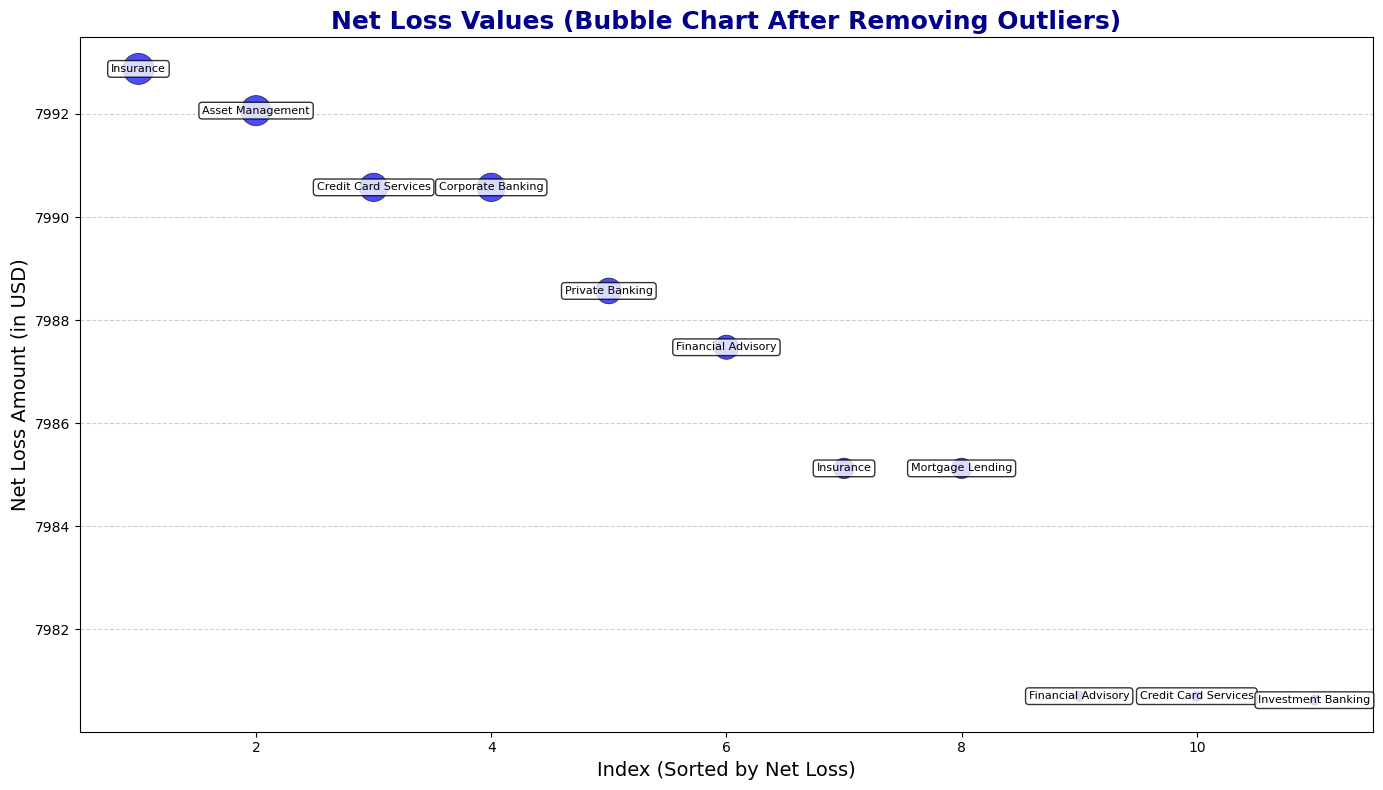

In [39]:
#in business line show in bubble chart whci has hoigh
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Assuming df is your dataframe
# Filter out negative Net Loss Amount
positive_df = df[df['Net Loss Amount'] > 7980]

# Extract the year from the Date column
positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year

# Set a threshold for identifying outliers (e.g., 95th percentile of the Net Loss Amount)
threshold = 8000  # Change this threshold as needed
# Identify outliers and count them
outliers_df = positive_df[positive_df['Net Loss Amount'] > threshold]
outlier_count = outliers_df.shape[0]

# Remove outliers from the data
filtered_df = positive_df[positive_df['Net Loss Amount'] <= threshold]

# Sort the remaining data by Net Loss Amount
sorted_df = filtered_df.sort_values(by='Net Loss Amount', ascending=False).reset_index(drop=True)

# Add an index column for plotting
sorted_df['Index'] = sorted_df.index + 1

# --- Simple Bubble Chart for Net Loss Values (After Removing Outliers) ---
plt.figure(figsize=(14, 8))
bubble_sizes = sorted_df['Net Loss Amount'] / 500  # Scale bubble sizes for better visualization

sns.scatterplot(
    x=sorted_df['Index'],
    y=sorted_df['Net Loss Amount'],
    size=bubble_sizes,
    sizes=(50, 500),  # Range for bubble sizes
    color="blue",
    edgecolor="black",
    alpha=0.7,  # Slight transparency
    legend=False
)

# Add labels to each bubble with the corresponding Business Line
for i in range(len(sorted_df)):
    plt.text(
        sorted_df['Index'].iloc[i],
        sorted_df['Net Loss Amount'].iloc[i],
        sorted_df['Business Line'].iloc[i],  # Add Business Line here
        ha='center',
        va='center',
        fontsize=8,
        color='black',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
    )

# Add title and labels
plt.title("Net Loss Values (Bubble Chart After Removing Outliers)", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("Index (Sorted by Net Loss)", fontsize=14)
plt.ylabel("Net Loss Amount (in USD)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show outlier count
print(f"Number of events with outlier net loss (> {threshold}): {outlier_count}")

plt.show()


Number of events with outlier net loss (> 8000): 995


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29372\570083834.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year


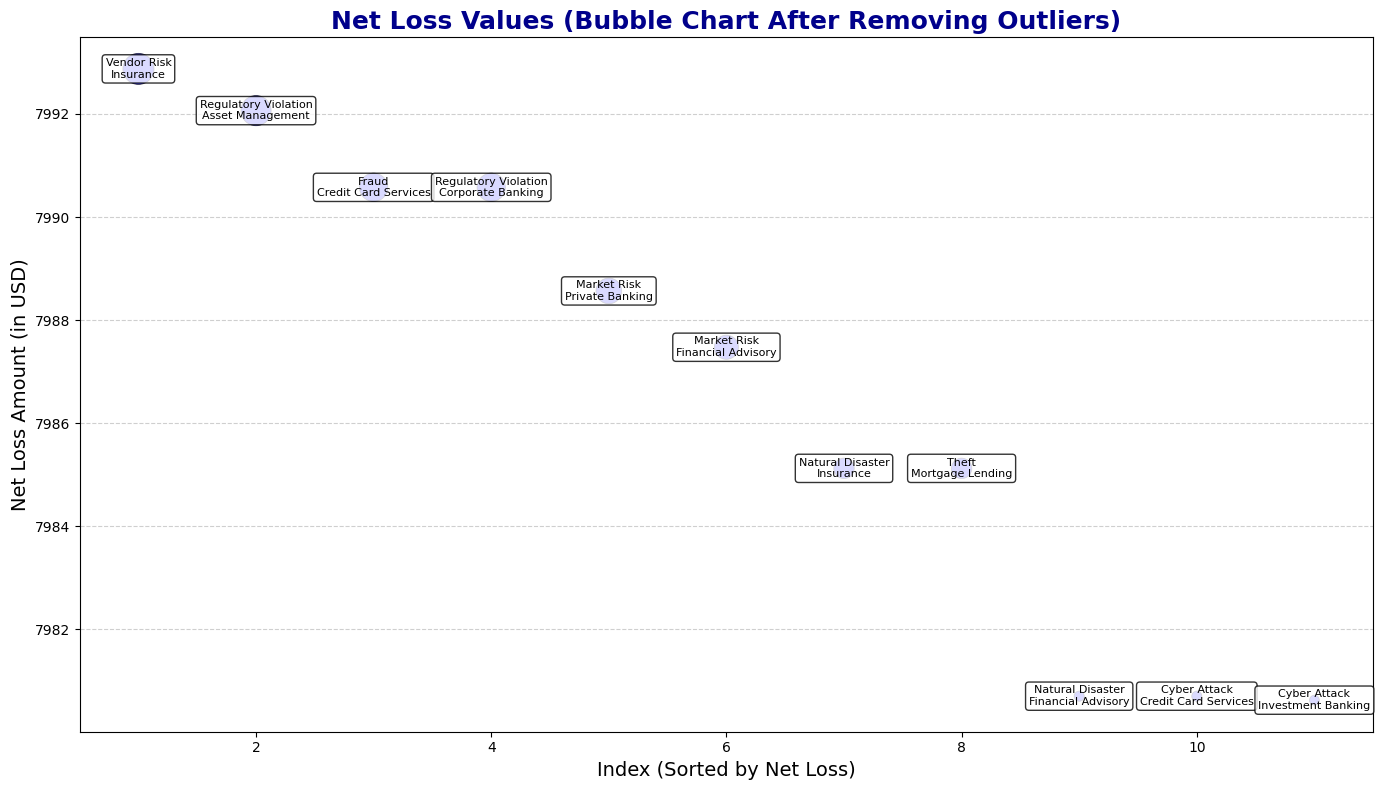

In [41]:
#event type+business lien
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Assuming df is your dataframe
# Filter out negative Net Loss Amount
positive_df = df[df['Net Loss Amount'] > 7980]

# Extract the year from the Date column
positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year

# Set a threshold for identifying outliers (e.g., 95th percentile of the Net Loss Amount)
threshold = 8000  # Change this threshold as needed
# Identify outliers and count them
outliers_df = positive_df[positive_df['Net Loss Amount'] > threshold]
outlier_count = outliers_df.shape[0]

# Remove outliers from the data
filtered_df = positive_df[positive_df['Net Loss Amount'] <= threshold]

# Sort the remaining data by Net Loss Amount
sorted_df = filtered_df.sort_values(by='Net Loss Amount', ascending=False).reset_index(drop=True)

# Add an index column for plotting
sorted_df['Index'] = sorted_df.index + 1

# --- Simple Bubble Chart for Net Loss Values (After Removing Outliers) ---
plt.figure(figsize=(14, 8))
bubble_sizes = sorted_df['Net Loss Amount'] / 500  # Scale bubble sizes for better visualization

sns.scatterplot(
    x=sorted_df['Index'],
    y=sorted_df['Net Loss Amount'],
    size=bubble_sizes,
    sizes=(50, 500),  # Range for bubble sizes
    color="blue",
    edgecolor="black",
    alpha=0.7,  # Slight transparency
    legend=False
)

# Add labels to each bubble with the corresponding Event Type and Business Line
for i in range(len(sorted_df)):
    label = f"{sorted_df['Event Type'].iloc[i]}\n{sorted_df['Business Line'].iloc[i]}"
    plt.text(
        sorted_df['Index'].iloc[i],
        sorted_df['Net Loss Amount'].iloc[i],
        label,  # Combine Event Type and Business Line in the label
        ha='center',
        va='center',
        fontsize=8,
        color='black',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
    )

# Add title and labels
plt.title("Net Loss Values (Bubble Chart After Removing Outliers)", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("Index (Sorted by Net Loss)", fontsize=14)
plt.ylabel("Net Loss Amount (in USD)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show outlier count
print(f"Number of events with outlier net loss (> {threshold}): {outlier_count}")

plt.show()


Number of events with outlier net loss (> 8000): 995


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29372\2645316761.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year


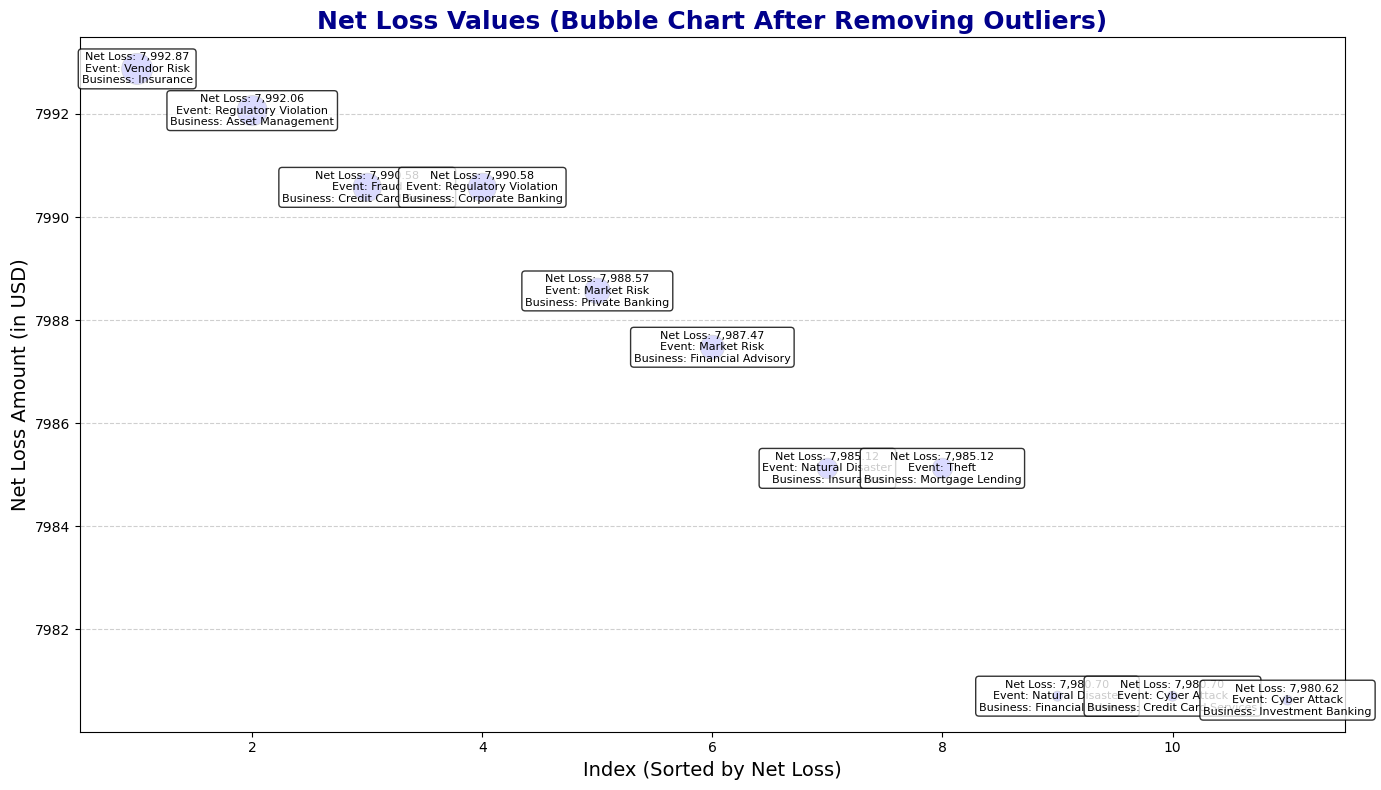

In [48]:
#To display the Net Loss Amount along with the Event Type and Business Line
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Assuming df is your dataframe
# Filter out negative Net Loss Amount
positive_df = df[df['Net Loss Amount'] > 7980]

# Extract the year from the Date column
positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year

# Set a threshold for identifying outliers (e.g., 95th percentile of the Net Loss Amount)
threshold = 8000  # Change this threshold as needed
# Identify outliers and count them
outliers_df = positive_df[positive_df['Net Loss Amount'] > threshold]
outlier_count = outliers_df.shape[0]

# Remove outliers from the data
filtered_df = positive_df[positive_df['Net Loss Amount'] <= threshold]

# Sort the remaining data by Net Loss Amount
sorted_df = filtered_df.sort_values(by='Net Loss Amount', ascending=False).reset_index(drop=True)

# Add an index column for plotting
sorted_df['Index'] = sorted_df.index + 1

# --- Simple Bubble Chart for Net Loss Values (After Removing Outliers) ---
plt.figure(figsize=(14, 8))
bubble_sizes = sorted_df['Net Loss Amount'] / 500  # Scale bubble sizes for better visualization

sns.scatterplot(
    x=sorted_df['Index'],
    y=sorted_df['Net Loss Amount'],
    size=bubble_sizes,
    sizes=(50, 500),  # Range for bubble sizes
    color="blue",
    edgecolor="black",
    alpha=0.7,  # Slight transparency
    legend=False
)

# Add labels to each bubble with the corresponding Event Type, Business Line, and Net Loss Amount
for i in range(len(sorted_df)):
    label = f"Net Loss: {sorted_df['Net Loss Amount'].iloc[i]:,.2f}\nEvent: {sorted_df['Event Type'].iloc[i]}\nBusiness: {sorted_df['Business Line'].iloc[i]}"
    plt.text(
        sorted_df['Index'].iloc[i],
        sorted_df['Net Loss Amount'].iloc[i],
        label,  # Combined label with Net Loss, Event Type, and Business Line
        ha='center',
        va='center',
        fontsize=8,
        color='black',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)
    )

# Add title and labels
plt.title("Net Loss Values (Bubble Chart After Removing Outliers)", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("Index (Sorted by Net Loss)", fontsize=14)
plt.ylabel("Net Loss Amount (in USD)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show outlier count
print(f"Number of events with outlier net loss (> {threshold}): {outlier_count}")

plt.show()


In [49]:
#If you don't want the text labels to be enclosed in a box, you can remove the bbox

Number of events with outlier net loss (> 8000): 995


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_29372\4231125260.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year


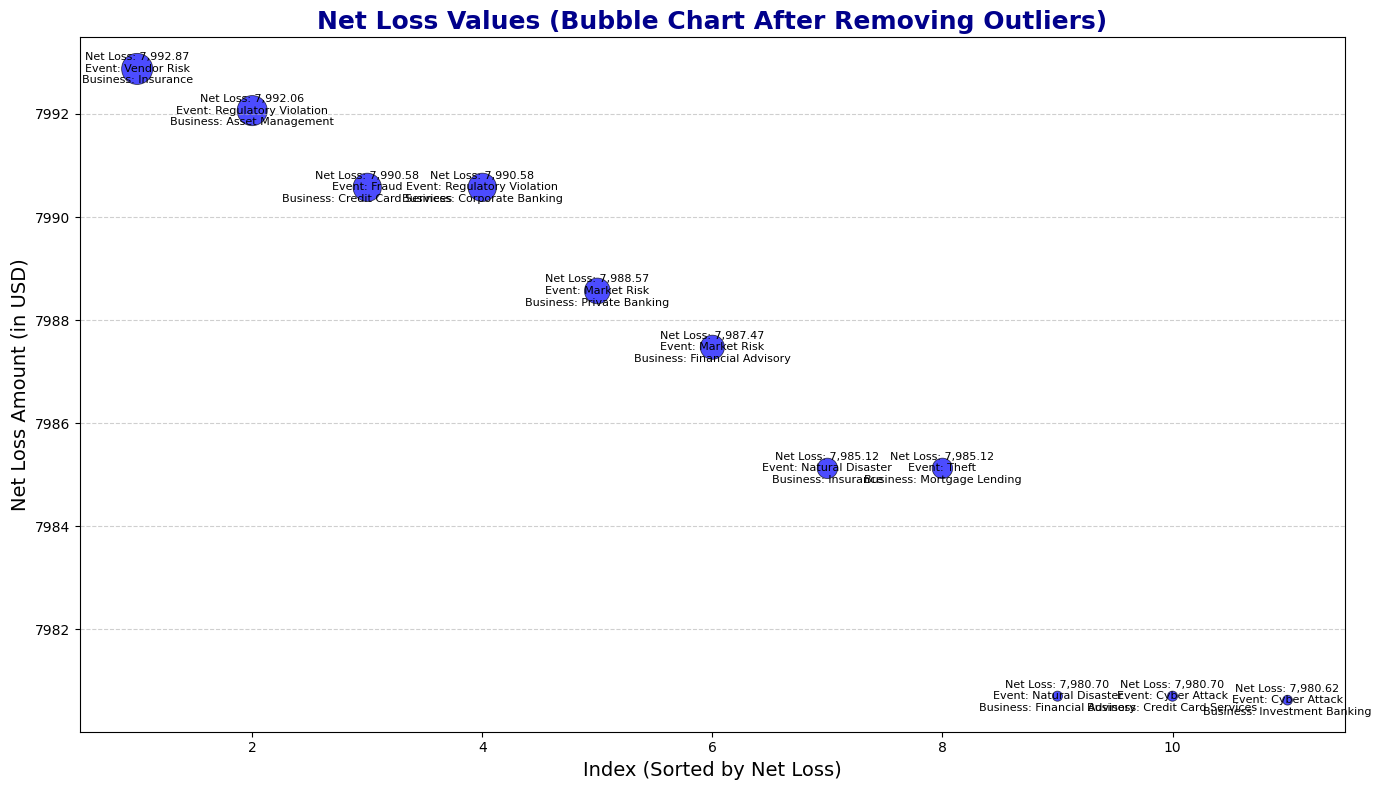

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example: Assuming df is your dataframe
# Filter out negative Net Loss Amount
positive_df = df[df['Net Loss Amount'] > 7980]

# Extract the year from the Date column
positive_df['Year'] = pd.to_datetime(positive_df['Date']).dt.year

# Set a threshold for identifying outliers (e.g., 95th percentile of the Net Loss Amount)
threshold = 8000  # Change this threshold as needed
# Identify outliers and count them
outliers_df = positive_df[positive_df['Net Loss Amount'] > threshold]
outlier_count = outliers_df.shape[0]

# Remove outliers from the data
filtered_df = positive_df[positive_df['Net Loss Amount'] <= threshold]

# Sort the remaining data by Net Loss Amount
sorted_df = filtered_df.sort_values(by='Net Loss Amount', ascending=False).reset_index(drop=True)

# Add an index column for plotting
sorted_df['Index'] = sorted_df.index + 1

# --- Simple Bubble Chart for Net Loss Values (After Removing Outliers) ---
plt.figure(figsize=(14, 8))
bubble_sizes = sorted_df['Net Loss Amount'] / 500  # Scale bubble sizes for better visualization

sns.scatterplot(
    x=sorted_df['Index'],
    y=sorted_df['Net Loss Amount'],
    size=bubble_sizes,
    sizes=(50, 500),  # Range for bubble sizes
    color="blue",
    edgecolor="black",
    alpha=0.7,  # Slight transparency
    legend=False
)

# Add labels to each bubble with the corresponding Event Type, Business Line, and Net Loss Amount
for i in range(len(sorted_df)):
    label = f"Net Loss: {sorted_df['Net Loss Amount'].iloc[i]:,.2f}\nEvent: {sorted_df['Event Type'].iloc[i]}\nBusiness: {sorted_df['Business Line'].iloc[i]}"
    plt.text(
        sorted_df['Index'].iloc[i],
        sorted_df['Net Loss Amount'].iloc[i],
        label,  # Combined label with Net Loss, Event Type, and Business Line
        ha='center',
        va='center',
        fontsize=8,
        color='black'
    )

# Add title and labels
plt.title("Net Loss Values (Bubble Chart After Removing Outliers)", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("Index (Sorted by Net Loss)", fontsize=14)
plt.ylabel("Net Loss Amount (in USD)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show outlier count
print(f"Number of events with outlier net loss (> {threshold}): {outlier_count}")

plt.show()
